# Importing Libraries

In [93]:
# Import necessary libraries for data manipulation, visualization, and machine learning.

# NumPy for numerical operations and array handling.
import numpy as np

# Pandas for data manipulation and analysis.
import pandas as pd

# Seaborn for statistical data visualization.
import seaborn as sns

# Matplotlib for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

# Counter for counting occurrences of elements in a collection.
from collections import Counter

# CountVectorizer for converting text data into a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

# Functions for splitting data and evaluating model performance.
from sklearn.model_selection import train_test_split

# Linear models for regression tasks.
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Ensemble methods for regression.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Decision tree regressor for modeling.
from sklearn.tree import DecisionTreeRegressor

# Support Vector Regression (SVR) for regression tasks.
from sklearn.svm import SVR

# Metrics for evaluating model performance.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Booking Hotels Dataset

Here we have a dataset Overview

Name -> Hotel Name

Place -> Place of hotel

Type -> Type of hotel

Price -> Price for 2 people in Rupees(₹)

ReviewsCount -> Total reviews count

Ratings -> Ratings out of 10

City -> City in which the hotel is located

State -> State in which the hotel is located

# Load the Dataset

In [6]:
# Load the dataset
df = pd.read_excel('HotelFinalDataset.xlsx')

# EDA

In [8]:
# Display first five rows of the dataset
df.head()

,Unnamed: 0,Name,Place,Type,Price,ReviewsCount,Rating,City,State
0,0,BUNK Hotel Amsterdam,"Amsterdam Noord, Amsterdam",Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam
1,1,YOTEL Amsterdam,"Amsterdam Noord, Amsterdam",Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam
2,2,Multatuli Hotel,"Amsterdam City Center, Amsterdam",Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam
3,3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam
4,4,Motel One Amsterdam,"Zuideramstel, Amsterdam",Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam


In [9]:
# Display last five rows of the dataset
df.tail()

,Unnamed: 0,Name,Place,Type,Price,ReviewsCount,Rating,City,State
520,520,Stadslogement Bij de Sassenpoort,Zwolle,Superior Apartment,"₹ 8,899",232.0,8.4,Zwolle,NaN
521,521,Mercure Hotel Zwolle,Zwolle,Standard Double Room,"₹ 10,205",1402.0,7.7,Zwolle,NaN
522,522,The Cabin at Zwolle Centraal,Zwolle,Double Room with Private Bathroom,"₹ 6,123",149.0,7.2,Zwolle,NaN
523,523,Hanze Hotel Zwolle,Zwolle,Standard Twin Room,"₹ 7,789",1095.0,7.2,Zwolle,NaN
524,524,Campanile Hotel & Restaurant Zwolle,Zwolle,Double Room,"₹ 6,870",2071.0,6.4,Zwolle,NaN


In [10]:
# Display random 5 rows of the dataset
df.sample(5)

,Unnamed: 0,Name,Place,Type,Price,ReviewsCount,Rating,City,State
8,8,The Alfred Hotel,"Oud Zuid, Amsterdam",Standard Double Room,"₹ 12,655",2069.0,7.3,Oud Zuid,Amsterdam
64,64,Parkhotel Mastbosch Breda,Breda,Standard Twin Room,"₹ 8,187",1136.0,7.7,Breda,NaN
265,265,Townhouse Design Hotel & Spa,"Wijck, Maastricht",Large Double Room,"₹ 23,440",2655.0,7.9,Wijck,Maastricht
71,71,The Student Hotel Delft,Delft,Superior Queen Room,"₹ 6,287",500.0,8.8,Delft,NaN
414,414,De Heek,Valkenburg,Comfort Double Room with Shower,"₹ 15,675",346.0,8.6,Valkenburg,NaN


In [11]:
df.shape

(525, 9)

In [12]:
df.dtypes

Unnamed: 0        int64
Name             object
Place            object
Type             object
Price            object
ReviewsCount    float64
Rating          float64
City             object
State            object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    525 non-null    int64  
 1   Name          525 non-null    object 
 2   Place         525 non-null    object 
 3   Type          525 non-null    object 
 4   Price         525 non-null    object 
 5   ReviewsCount  512 non-null    float64
 6   Rating        515 non-null    float64
 7   City          525 non-null    object 
 8   State         133 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.0+ KB


In [14]:
# Display basic statistical details of the dataset
df.describe()

,Unnamed: 0,ReviewsCount,Rating
count,525.000000,512.000000,515.000000
mean,262.000000,736.556641,8.331456
std,151.698715,879.553639,0.711974
min,0.000000,1.000000,3.700000
25%,131.000000,239.000000,8.000000
50%,262.000000,500.000000,8.400000
75%,393.000000,888.000000,8.800000
max,524.000000,7748.000000,10.000000


# Data Cleaning and Preprocessing

In [16]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0', 'Place'], axis=1)

In [17]:
df

,Name,Type,Price,ReviewsCount,Rating,City,State
0,BUNK Hotel Amsterdam,Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam
1,YOTEL Amsterdam,Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam
2,Multatuli Hotel,Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam
3,nhow Amsterdam Rai,nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam
4,Motel One Amsterdam,Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam
...,...,...,...,...,...,...,...
520,Stadslogement Bij de Sassenpoort,Superior Apartment,"₹ 8,899",232.0,8.4,Zwolle,NaN
521,Mercure Hotel Zwolle,Standard Double Room,"₹ 10,205",1402.0,7.7,Zwolle,NaN
522,The Cabin at Zwolle Centraal,Double Room with Private Bathroom,"₹ 6,123",149.0,7.2,Zwolle,NaN
523,Hanze Hotel Zwolle,Standard Twin Room,"₹ 7,789",1095.0,7.2,Zwolle,NaN


In [18]:
#Checking for Null Values
df.isnull()

,Name,Type,Price,ReviewsCount,Rating,City,State
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
520,False,False,False,False,False,False,True
521,False,False,False,False,False,False,True
522,False,False,False,False,False,False,True
523,False,False,False,False,False,False,True


In [19]:
#Checking for missing values
df.isnull().sum()

Name              0
Type              0
Price             0
ReviewsCount     13
Rating           10
City              0
State           392
dtype: int64

In [20]:
# Remove rows with NaN values in 'ReviewsCount' and 'Rating' columns
df = df.dropna(subset=['ReviewsCount', 'Rating'])

In [21]:
#Checking for missing values
df.isnull().sum()

Name              0
Type              0
Price             0
ReviewsCount      0
Rating            0
City              0
State           380
dtype: int64

In [22]:
# Group the DataFrame 'df' by the 'Type' column and count the number of entries (rows) for each unique value in the 'Type' column. 
# This results in a Series with the counts of 'Name' for each 'Type'.
df.groupby('Type').Name.count()

Type
 Deluxe double or Twin Room                       1
1 Queen or King Bed Essential Room                1
2-person Premium Hotelroom                        1
6 Person Room with Private Bathroom and Shower    1
Apartment                                         2
                                                 ..
Two-Bedroom Chalet                                3
Two-Bedroom House                                 6
Two-Bedroom Suite                                 1
bunk                                              1
nhow Double or Twin Room with View                1
Name: Name, Length: 187, dtype: int64

In [23]:
# Extract the values from the 'Type' column of the DataFrame 'df' as a NumPy array and assign it to the variable 'data_set'.
# This creates a one-dimensional array containing the values of the 'Type' column.
data_set = df.Type.values

In [24]:
data_set

array(['Bunk Pod for 2', 'Premium Double Room', 'Double Room',
       'nhow Double or Twin Room with View', 'Double Room',
       'The Innside Guestroom', 'Small Double Room', 'King Room',
       'Standard Double Room', 'Twin Room',
       'Superior Double or Twin Room', 'Small Double Room',
       'Queen Room - Disability Access', 'Standard Double or Twin Room',
       'Double or Twin Room', 'Comfort Double or Twin Room',
       '1 Queen or King Bed Essential Room',
       'Standard Double Room - No Window', 'Small Double Room',
       'Double Room', 'Standard Twin Bunk with Shared Bathroom',
       'Classic Double Room', 'Double Room', 'Twin Room', 'Holiday Home',
       'Holiday Home', 'Holiday Home', 'Holiday Home', 'Holiday Home',
       'Holiday Home', 'Holiday Home', 'Holiday Home',
       'Two-Bedroom House', 'Holiday Home', 'Holiday Home',
       'Holiday Home', 'Holiday Home', 'Holiday Home', 'Holiday Home',
       'Holiday Home', 'Holiday Home', 'Holiday Home', 'Holiday Home

In [25]:
# Convert the NumPy array 'data_set' to a Python list. This allows for more flexible operations that are specific to lists.
data_set = list(data_set)

In [26]:
data_set

['Bunk Pod for 2',
 'Premium Double Room',
 'Double Room',
 'nhow Double or Twin Room with View',
 'Double Room',
 'The Innside Guestroom',
 'Small Double Room',
 'King Room',
 'Standard Double Room',
 'Twin Room',
 'Superior Double or Twin Room',
 'Small Double Room',
 'Queen Room - Disability Access',
 'Standard Double or Twin Room',
 'Double or Twin Room',
 'Comfort Double or Twin Room',
 '1 Queen or King Bed Essential Room',
 'Standard Double Room - No Window',
 'Small Double Room',
 'Double Room',
 'Standard Twin Bunk with Shared Bathroom',
 'Classic Double Room',
 'Double Room',
 'Twin Room',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Two-Bedroom House',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home',
 'Holiday Home'

In [27]:
# Join all elements of the list 'data_set' into a single string, with each element separated by a space.
# This results in a single string where the values from the 'Type' column are concatenated with spaces in between.
data_set = ' '.join(data_set)

In [28]:
data_set

'Bunk Pod for 2 Premium Double Room Double Room nhow Double or Twin Room with View Double Room The Innside Guestroom Small Double Room King Room Standard Double Room Twin Room Superior Double or Twin Room Small Double Room Queen Room - Disability Access Standard Double or Twin Room Double or Twin Room Comfort Double or Twin Room 1 Queen or King Bed Essential Room Standard Double Room - No Window Small Double Room Double Room Standard Twin Bunk with Shared Bathroom Classic Double Room Double Room Twin Room Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Two-Bedroom House Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Holiday Home Double Room with Shared Bathroom Two-Bedroom Apartment Two-Bedroom House One-Bedroom Apartment Small Double Room with Shared Bathroom Double Room with Private 

In [29]:
# Split the string 'data_set' into a list of substrings based on whitespace, resulting in a list of individual 'Type' values.
split_str = data_set.split()
split_str

['Bunk',
 'Pod',
 'for',
 '2',
 'Premium',
 'Double',
 'Room',
 'Double',
 'Room',
 'nhow',
 'Double',
 'or',
 'Twin',
 'Room',
 'with',
 'View',
 'Double',
 'Room',
 'The',
 'Innside',
 'Guestroom',
 'Small',
 'Double',
 'Room',
 'King',
 'Room',
 'Standard',
 'Double',
 'Room',
 'Twin',
 'Room',
 'Superior',
 'Double',
 'or',
 'Twin',
 'Room',
 'Small',
 'Double',
 'Room',
 'Queen',
 'Room',
 '-',
 'Disability',
 'Access',
 'Standard',
 'Double',
 'or',
 'Twin',
 'Room',
 'Double',
 'or',
 'Twin',
 'Room',
 'Comfort',
 'Double',
 'or',
 'Twin',
 'Room',
 '1',
 'Queen',
 'or',
 'King',
 'Bed',
 'Essential',
 'Room',
 'Standard',
 'Double',
 'Room',
 '-',
 'No',
 'Window',
 'Small',
 'Double',
 'Room',
 'Double',
 'Room',
 'Standard',
 'Twin',
 'Bunk',
 'with',
 'Shared',
 'Bathroom',
 'Classic',
 'Double',
 'Room',
 'Double',
 'Room',
 'Twin',
 'Room',
 'Holiday',
 'Home',
 'Holiday',
 'Home',
 'Holiday',
 'Home',
 'Holiday',
 'Home',
 'Holiday',
 'Home',
 'Holiday',
 'Home',
 'Holida

In [30]:
# Create a Counter object from the list 'split_str' to count the frequency of each unique value.
Counter = Counter(split_str)

In [31]:
Counter

Counter({'Room': 356,
         'Double': 214,
         'Twin': 102,
         'with': 85,
         'Standard': 79,
         'Deluxe': 65,
         'Apartment': 50,
         'Comfort': 47,
         'Bathroom': 35,
         'One-Bedroom': 32,
         'or': 31,
         'Home': 26,
         'King': 25,
         'Suite': 25,
         'Holiday': 24,
         'Superior': 23,
         'Studio': 23,
         'Small': 21,
         'Private': 21,
         'Two-Bedroom': 18,
         'View': 17,
         'Queen': 17,
         'Shower': 17,
         'Shared': 16,
         'City': 11,
         'House': 10,
         'Balcony': 10,
         'Budget': 8,
         'Junior': 8,
         'and': 8,
         'Bed': 7,
         'Classic': 7,
         'Triple': 6,
         'Quadruple': 6,
         '1': 5,
         'Family': 5,
         'Bunk': 4,
         '(2': 4,
         'Three-Bedroom': 4,
         'Chalet': 4,
         'Premium': 3,
         '-': 3,
         'Basic': 3,
         'Adults': 3,
         '+'

In [32]:
# Retrieve the 10 most common values and their counts from the Counter object.
common = Counter.most_common(10)

# Print the 10 most common values along with their counts.
print(common)

[('Room', 356), ('Double', 214), ('Twin', 102), ('with', 85), ('Standard', 79), ('Deluxe', 65), ('Apartment', 50), ('Comfort', 47), ('Bathroom', 35), ('One-Bedroom', 32)]


In [33]:
# Create an empty list 'types' to store the unique types from the 'common' variable.
types = []
# Iterate over the most common types, convert each type to lowercase, and append it to the 'types' list.
for tup in common:
    types.append(tup[0].lower())

In [34]:
print(types)

['room', 'double', 'twin', 'with', 'standard', 'deluxe', 'apartment', 'comfort', 'bathroom', 'one-bedroom']


# One Hot Encoding
##### (?u): 
Enables Unicode support, so the pattern can handle a wide range of characters.

##### \\\b: 
Word boundary marker, ensuring that tokens are recognized at word boundaries.

##### [\\w-]+: 
Matches sequences of word characters (letters, digits) and hyphens. This allows tokens to include hyphens (e.g., one-bedroom).

##### \\\b: 
End of the word boundary marker.

In [36]:
# Define a pattern for tokenization: words or hyphenated words.
pattern = "(?u)\\b[\\w-]+\\b"
# Initialize a CountVectorizer with the specified vocabulary (types) and token pattern.
cv = CountVectorizer(vocabulary=types, token_pattern=pattern)

# Transform the 'Type' column in the DataFrame 'df' into one-hot encoded vectors and convert it to a dense matrix.
# Create a new DataFrame 'one_hot' with the one-hot encoded vectors, using the original DataFrame's index and the feature names from CountVectorizer.
one_hot = pd.DataFrame(cv.fit_transform(df['Type']).todense(), 
                       df.index,
                       cv.get_feature_names_out())

In [37]:
one_hot

,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
520,0,0,0,0,0,0,1,0,0,0
521,1,1,0,0,1,0,0,0,0,0
522,1,1,0,1,0,0,0,0,1,0
523,1,0,1,0,1,0,0,0,0,0


In [38]:
# Convert all elements in the 'one_hot' DataFrame to numeric values.
# This ensures that the data is in numeric format, which is often necessary for further data processing and analysis.
one_hot = one_hot.apply(pd.to_numeric)

In [39]:
one_hot.dtypes

room           int64
double         int64
twin           int64
with           int64
standard       int64
deluxe         int64
apartment      int64
comfort        int64
bathroom       int64
one-bedroom    int64
dtype: object

In [40]:
# Join the one-hot encoded DataFrame 'one_hot' with the original DataFrame 'df'.
# This adds the one-hot encoded columns to 'df', expanding it with new features corresponding to the types.
df = df.join(one_hot)

In [41]:
df

,Name,Type,Price,ReviewsCount,Rating,City,State,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
0,BUNK Hotel Amsterdam,Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam,0,0,0,0,0,0,0,0,0,0
1,YOTEL Amsterdam,Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam,1,1,0,0,0,0,0,0,0,0
2,Multatuli Hotel,Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam,1,1,0,0,0,0,0,0,0,0
3,nhow Amsterdam Rai,nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam,1,1,1,1,0,0,0,0,0,0
4,Motel One Amsterdam,Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,Stadslogement Bij de Sassenpoort,Superior Apartment,"₹ 8,899",232.0,8.4,Zwolle,NaN,0,0,0,0,0,0,1,0,0,0
521,Mercure Hotel Zwolle,Standard Double Room,"₹ 10,205",1402.0,7.7,Zwolle,NaN,1,1,0,0,1,0,0,0,0,0
522,The Cabin at Zwolle Centraal,Double Room with Private Bathroom,"₹ 6,123",149.0,7.2,Zwolle,NaN,1,1,0,1,0,0,0,0,1,0
523,Hanze Hotel Zwolle,Standard Twin Room,"₹ 7,789",1095.0,7.2,Zwolle,NaN,1,0,1,0,1,0,0,0,0,0


In [42]:
df = df.drop(['Type'], axis=1)

In [43]:
#removing the currency symbol
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('₹', '')
df['Price'] = df['Price'].astype(float)

In [44]:
df.head()

,Name,Price,ReviewsCount,Rating,City,State,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
0,BUNK Hotel Amsterdam,7887.0,778.0,8.4,Amsterdam Noord,Amsterdam,0,0,0,0,0,0,0,0,0,0
1,YOTEL Amsterdam,15267.0,500.0,8.1,Amsterdam Noord,Amsterdam,1,1,0,0,0,0,0,0,0,0
2,Multatuli Hotel,13063.0,1605.0,7.4,Amsterdam City Center,Amsterdam,1,1,0,0,0,0,0,0,0,0
3,nhow Amsterdam Rai,12854.0,500.0,9.0,Zuideramstel,Amsterdam,1,1,1,1,0,0,0,0,0,0
4,Motel One Amsterdam,9471.0,500.0,8.8,Zuideramstel,Amsterdam,1,1,0,0,0,0,0,0,0,0


In [45]:
df.dtypes

Name             object
Price           float64
ReviewsCount    float64
Rating          float64
City             object
State            object
room              int64
double            int64
twin              int64
with              int64
standard          int64
deluxe            int64
apartment         int64
comfort           int64
bathroom          int64
one-bedroom       int64
dtype: object

In [46]:
#one-hots for City
cities = pd.get_dummies(df['City'])
#one-hots for State
states =pd.get_dummies(df['State']) 

In [47]:
# Join the one-hot encoded 'cities' DataFrame with the original DataFrame 'df'.
# This adds new columns for each city to 'df'.
df = df.join(cities)

# Join the one-hot encoded 'states' DataFrame with the original DataFrame 'df'.
# This adds new columns for each state to 'df'.
df = df.join(states)

In [48]:
# Drop the 'Name', 'City', and 'State' columns
df = df.drop(['Name', 'City', 'State'], axis=1)

In [49]:
df.head()

,Price,ReviewsCount,Rating,room,double,twin,with,standard,deluxe,apartment,...,Zuid,Zuideramstel,Zuidwest,Zwolle,Amsterdam,Eindhoven,Maastricht,Rotterdam,The Hague,Utrecht
0,7887.0,778.0,8.4,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
1,15267.0,500.0,8.1,1,1,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,13063.0,1605.0,7.4,1,1,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,12854.0,500.0,9.0,1,1,1,1,0,0,0,...,False,True,False,False,True,False,False,False,False,False
4,9471.0,500.0,8.8,1,1,0,0,0,0,0,...,False,True,False,False,True,False,False,False,False,False


In [52]:
df

,Price,ReviewsCount,Rating,room,double,twin,with,standard,deluxe,apartment,...,Zuid,Zuideramstel,Zuidwest,Zwolle,Amsterdam,Eindhoven,Maastricht,Rotterdam,The Hague,Utrecht
0,7887.0,778.0,8.4,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
1,15267.0,500.0,8.1,1,1,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,13063.0,1605.0,7.4,1,1,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,12854.0,500.0,9.0,1,1,1,1,0,0,0,...,False,True,False,False,True,False,False,False,False,False
4,9471.0,500.0,8.8,1,1,0,0,0,0,0,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,8899.0,232.0,8.4,0,0,0,0,0,0,1,...,False,False,False,True,False,False,False,False,False,False
521,10205.0,1402.0,7.7,1,1,0,0,1,0,0,...,False,False,False,True,False,False,False,False,False,False
522,6123.0,149.0,7.2,1,1,0,1,0,0,0,...,False,False,False,True,False,False,False,False,False,False
523,7789.0,1095.0,7.2,1,0,1,0,1,0,0,...,False,False,False,True,False,False,False,False,False,False



# Some Statistics

In [54]:
df[['Price', 'ReviewsCount', 'Rating']].describe()

,Price,ReviewsCount,Rating
count,512.000000,512.000000,512.000000
mean,12812.464844,736.556641,8.330273
std,6514.815246,879.553639,0.713554
min,3988.000000,1.000000,3.700000
25%,8693.000000,239.000000,8.000000
50%,11199.500000,500.000000,8.400000
75%,14288.000000,888.000000,8.800000
max,53439.000000,7748.000000,10.000000


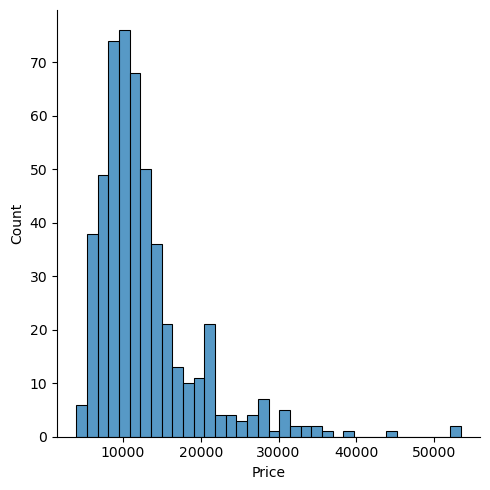

In [55]:
sns.displot(df['Price'])

# Removing Outliers

In [58]:
# Remove outliers in 'Price' based on the 1st and 99th percentiles
q_low_price, q_hi_price = df['Price'].quantile([0.01, 0.99])
df = df[(df['Price'] > q_low_price) & (df['Price'] < q_hi_price)]

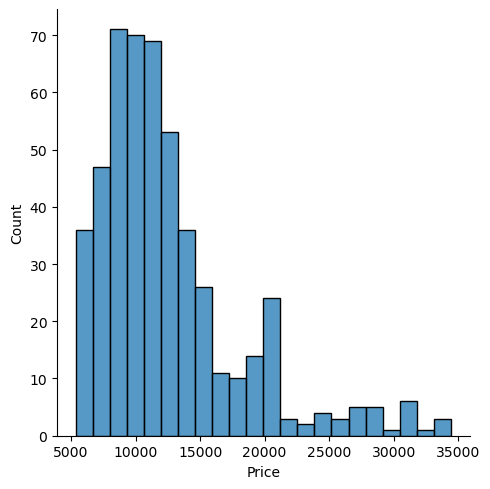

In [59]:
sns.displot(df['Price'])

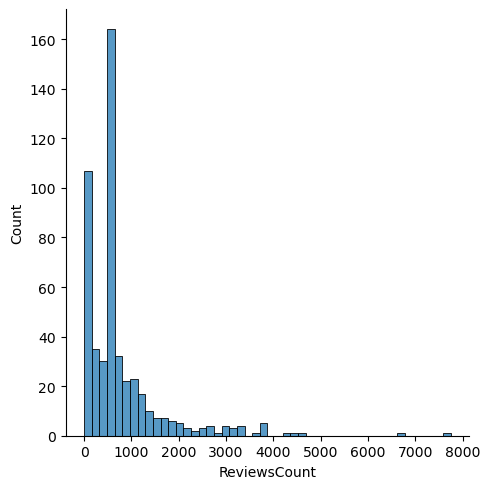

In [60]:
sns.displot(df['ReviewsCount'])

In [61]:
# Remove outliers in 'ReviewsCount' based on the 1st and 99th percentiles
q_low_reviews, q_hi_reviews = df['ReviewsCount'].quantile([0.01, 0.99])
df = df[(df['ReviewsCount'] > q_low_reviews) & (df['ReviewsCount'] < q_hi_reviews)]

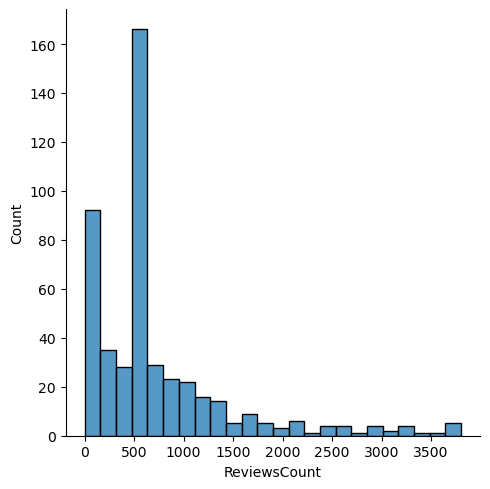

In [62]:
sns.displot(df['ReviewsCount'])

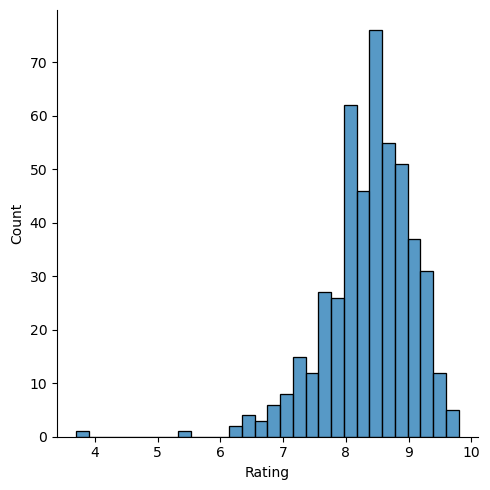

In [63]:
sns.displot(df['Rating'])

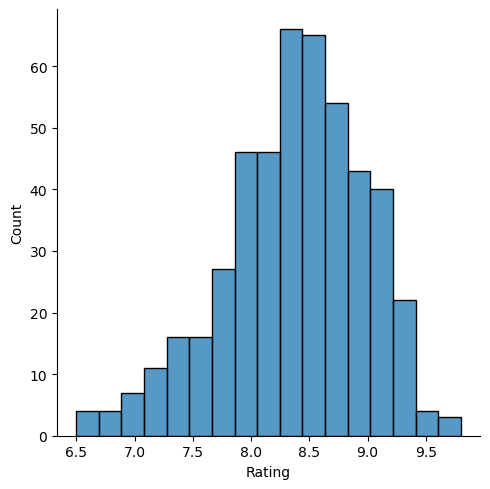

In [64]:
q1 = df['Rating'].quantile(0.01)
df = df[df['Rating'] > q1 ]
sns.displot(df['Rating'])

In [65]:
# Standardize the numerical columns
df = (df - df.mean()) / df.std()

In [66]:
df

,Price,ReviewsCount,Rating,room,double,twin,with,standard,deluxe,apartment,...,Zuid,Zuideramstel,Zuidwest,Zwolle,Amsterdam,Eindhoven,Maastricht,Rotterdam,The Hague,Utrecht
0,-0.835737,0.089264,0.035102,-1.574913,-0.864579,-0.519814,-0.450130,-0.433097,-0.394675,-0.323533,...,-0.045932,-0.103143,-0.045932,-0.209666,4.423497,-0.220386,-0.16775,-0.225589,-0.215081,-0.225589
1,0.536663,-0.290000,-0.449509,0.620701,1.154192,-0.519814,-0.450130,-0.433097,-0.394675,-0.323533,...,-0.045932,-0.103143,-0.045932,-0.209666,4.423497,-0.220386,-0.16775,-0.225589,-0.215081,-0.225589
2,0.126803,1.217504,-1.580269,0.620701,1.154192,-0.519814,-0.450130,-0.433097,-0.394675,-0.323533,...,-0.045932,-0.103143,-0.045932,-0.209666,4.423497,-0.220386,-0.16775,-0.225589,-0.215081,-0.225589
3,0.087937,-0.290000,1.004324,0.620701,1.154192,1.919708,2.216892,-0.433097,-0.394675,-0.323533,...,-0.045932,9.674818,-0.045932,-0.209666,4.423497,-0.220386,-0.16775,-0.225589,-0.215081,-0.225589
4,-0.541173,-0.290000,0.681250,0.620701,1.154192,-0.519814,-0.450130,-0.433097,-0.394675,-0.323533,...,-0.045932,9.674818,-0.045932,-0.209666,4.423497,-0.220386,-0.16775,-0.225589,-0.215081,-0.225589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,-0.715792,-0.541023,-0.287972,0.620701,-0.864579,1.919708,-0.450130,-0.433097,2.528386,-0.323533,...,-0.045932,-0.103143,-0.045932,4.759423,-0.225589,-0.220386,-0.16775,-0.225589,-0.215081,-0.225589
520,-0.647544,-0.655620,0.035102,-1.574913,-0.864579,-0.519814,-0.450130,-0.433097,-0.394675,3.084351,...,-0.045932,-0.103143,-0.045932,4.759423,-0.225589,-0.220386,-0.16775,-0.225589,-0.215081,-0.225589
521,-0.404677,0.940560,-1.095657,0.620701,1.154192,-0.519814,-0.450130,2.304078,-0.394675,-0.323533,...,-0.045932,-0.103143,-0.045932,4.759423,-0.225589,-0.220386,-0.16775,-0.225589,-0.215081,-0.225589
522,-1.163774,-0.768854,-1.903343,0.620701,1.154192,-0.519814,2.216892,-0.433097,-0.394675,-0.323533,...,-0.045932,-0.103143,-0.045932,4.759423,-0.225589,-0.220386,-0.16775,-0.225589,-0.215081,-0.225589


In [67]:
# Print the number of missing values for each column
print(df.isna().sum().to_string())

Price                       0
ReviewsCount                0
Rating                      0
room                        0
double                      0
twin                        0
with                        0
standard                    0
deluxe                      0
apartment                   0
comfort                     0
bathroom                    0
one-bedroom                 0
Amsterdam City Center       0
Amsterdam Noord             0
Bemelen                     0
Boschstraatkwartier         0
Breda                       0
Centrum                     0
City Centre                 0
Delfshaven                  0
Delft                       0
Den Bosch                   0
Eindhoven                   0
Eindhoven City Centre       0
Feijenoord                  0
Groningen                   0
Haagse Hout                 0
Haarlem                     0
Hoofddorp                   0
Jekerkwartier               0
Kralingen-Crooswijk         0
Laak                        0
Leeuwarden

In [68]:
# Drop the 'Randwijck' column
df = df.drop('Randwijck', axis=1)

In [69]:
print(df.isna().sum().to_string())

Price                     0
ReviewsCount              0
Rating                    0
room                      0
double                    0
twin                      0
with                      0
standard                  0
deluxe                    0
apartment                 0
comfort                   0
bathroom                  0
one-bedroom               0
Amsterdam City Center     0
Amsterdam Noord           0
Bemelen                   0
Boschstraatkwartier       0
Breda                     0
Centrum                   0
City Centre               0
Delfshaven                0
Delft                     0
Den Bosch                 0
Eindhoven                 0
Eindhoven City Centre     0
Feijenoord                0
Groningen                 0
Haagse Hout               0
Haarlem                   0
Hoofddorp                 0
Jekerkwartier             0
Kralingen-Crooswijk       0
Laak                      0
Leeuwarden                0
Maastricht                0
Maastricht City Cent

In [70]:
# Output statistics of numerical columns
print(df[['Price', 'ReviewsCount', 'Rating']].describe())

              Price  ReviewsCount        Rating
count  4.740000e+02  4.740000e+02  4.740000e+02
mean   2.998071e-17  2.998071e-17  7.794984e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -1.304920e+00 -9.693996e-01 -3.034102e+00
25%   -6.729739e-01 -5.918414e-01 -6.110463e-01
50%   -2.515373e-01 -2.899996e-01  3.510194e-02
75%    2.907747e-01  2.366036e-01  6.812502e-01
max    4.099883e+00  4.216141e+00  2.296621e+00


# Training

In [72]:
# Prepare data for modeling
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=200),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regression': SVR()
}

In [75]:
# Fit models and print scores
for model_name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train) * 100
    test_score = model.score(X_test, y_test) * 100
    print(f"Train Accuracy of {model_name}: {train_score:.2f}%")
    print(f"Accuracy (Test) score of {model_name}: {test_score:.2f}%\n")

Train Accuracy of Linear Regression: 58.19%
Accuracy (Test) score of Linear Regression: -22712577745235738657554432.00%

Train Accuracy of Ridge Regression: 58.19%
Accuracy (Test) score of Ridge Regression: 39.52%

Train Accuracy of Lasso Regression: 0.00%
Accuracy (Test) score of Lasso Regression: -0.22%

Train Accuracy of Random Forest: 91.72%
Accuracy (Test) score of Random Forest: 53.82%

Train Accuracy of Gradient Boosting: 78.08%
Accuracy (Test) score of Gradient Boosting: 51.64%

Train Accuracy of Decision Tree: 99.62%
Accuracy (Test) score of Decision Tree: 2.75%

Train Accuracy of Support Vector Regression: 59.46%
Accuracy (Test) score of Support Vector Regression: 38.50%



In [77]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'R^2': r2, 'MAE': mae}

##### MSE
1/n * ((actual - prediction)^2)

##### R^2
1 - ((actual - prediction)^2 / (actual - mean(actual)^2))

##### MAE
1/n * |actual - prediction|

In [79]:
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

                                    MSE           R^2           MAE
Linear Regression          2.506927e+23 -2.271258e+23  5.136994e+10
Ridge Regression           6.675377e-01  3.952157e-01  5.417634e-01
Lasso Regression           1.106243e+00 -2.248041e-03  7.411776e-01
Random Forest              5.060705e-01  5.415038e-01  5.140330e-01
Gradient Boosting          5.203857e-01  5.285344e-01  5.205025e-01
Decision Tree              1.031282e+00  6.566584e-02  7.023710e-01
Support Vector Regression  6.787987e-01  3.850133e-01  5.329404e-01


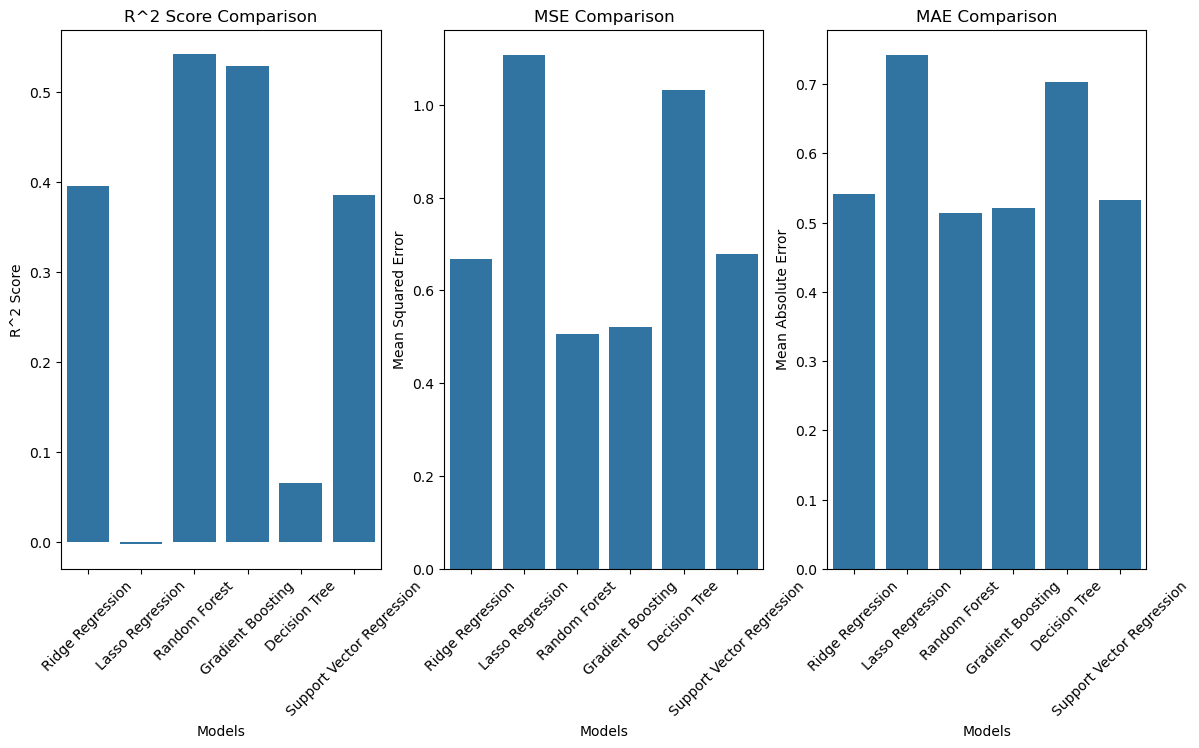

In [102]:
# Remove Linear Regression from the results for visualization
filtered_results_df = results_df.drop(index='Linear Regression')

# Visualization: Model comparison without Linear Regression
plt.figure(figsize=(14, 7))

# R^2 score comparison
plt.subplot(1, 3, 1)
sns.barplot(x=filtered_results_df.index, y=filtered_results_df['R^2'])
plt.xticks(rotation=45)
plt.title('R^2 Score Comparison')
plt.xlabel('Models')
plt.ylabel('R^2 Score')

# MSE comparison
plt.subplot(1, 3, 2)
sns.barplot(x=filtered_results_df.index, y=filtered_results_df['MSE'])
plt.xticks(rotation=45)
plt.title('MSE Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 3, 3)
sns.barplot(x=filtered_results_df.index, y=filtered_results_df['MAE'])
plt.xticks(rotation=45)
plt.title('MAE Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')

plt.show()

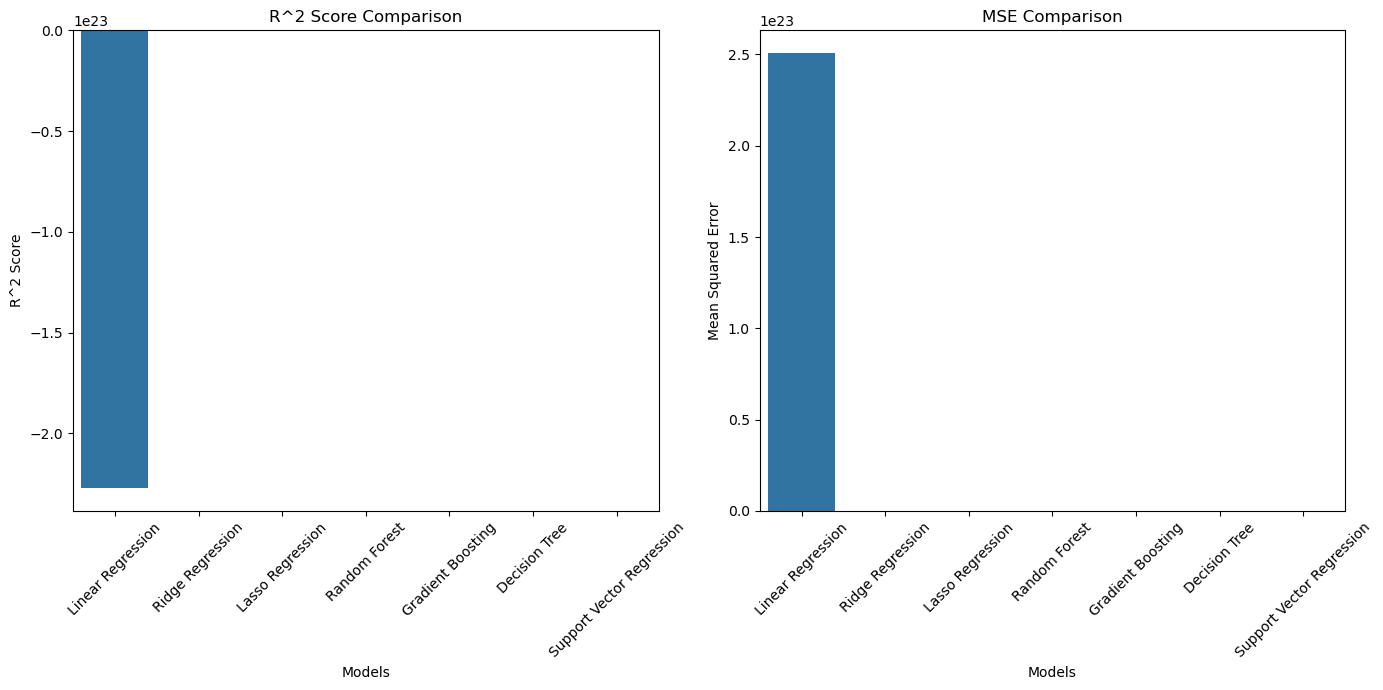

In [82]:
# Visualization: Model comparison
plt.figure(figsize=(14, 7))

# R^2 score comparison
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y=results_df['R^2'])
plt.xticks(rotation=45)
plt.title('R^2 Score Comparison')
plt.xlabel('Models')
plt.ylabel('R^2 Score')

# MSE comparison
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y=results_df['MSE'])
plt.xticks(rotation=45)
plt.title('MSE Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()

In [83]:
# Determine the best model based on each metric
best_model_mae_name = results_df['MAE'].idxmin()
best_model_mse_name = results_df['MSE'].idxmin()
best_model_r2_name = results_df['R^2'].idxmax()

best_model_mae = models[best_model_mae_name]
best_model_mse = models[best_model_mse_name]
best_model_r2 = models[best_model_r2_name]

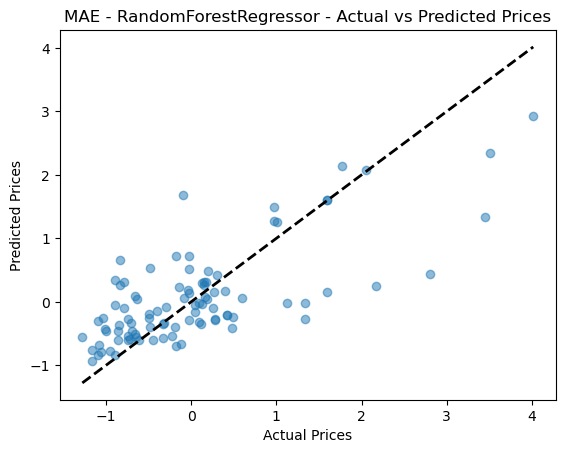

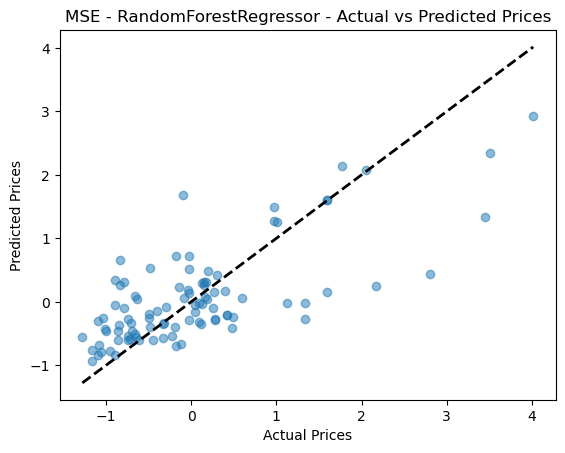

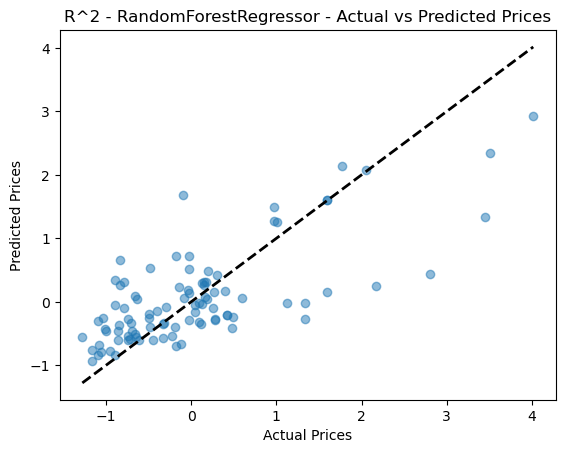

In [84]:
# Further evaluation of the best models
best_models = {
    'MAE': best_model_mae,
    'MSE': best_model_mse,
    'R^2': best_model_r2
}

for metric, model in best_models.items():
    y_pred_best = model.predict(X_test)
    plt.figure()
    plt.scatter(y_test, y_pred_best, alpha=0.5)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{metric} - {model.__class__.__name__} - Actual vs Predicted Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.show()

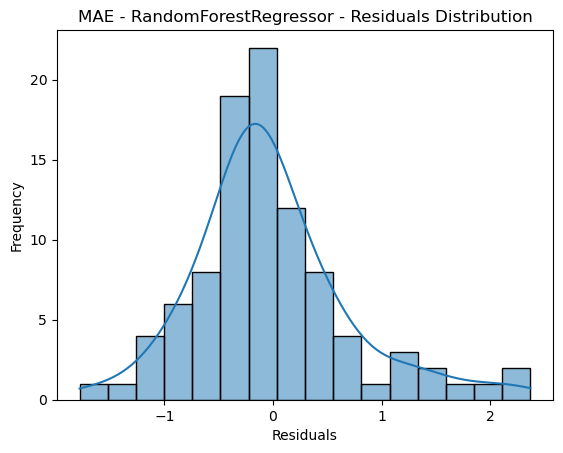

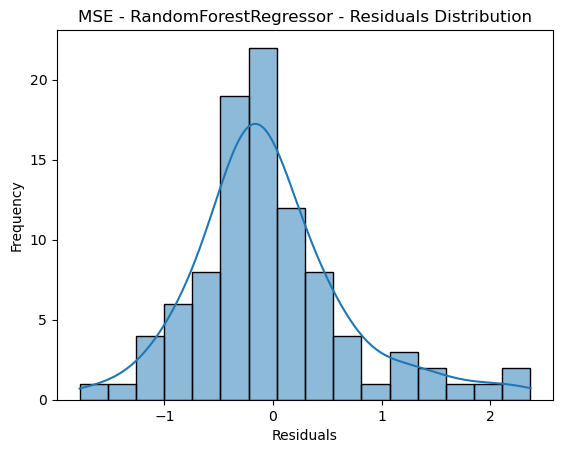

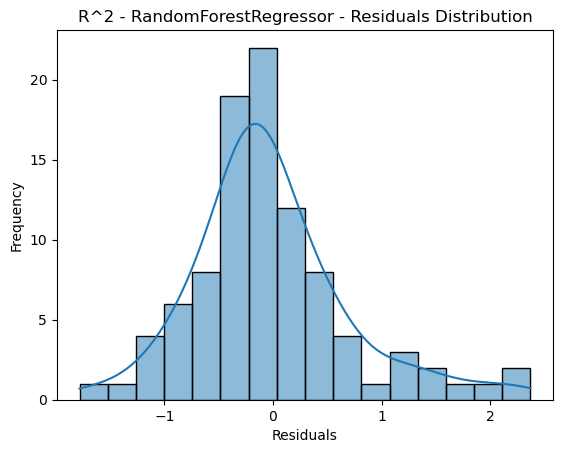

In [85]:
# Residuals plot
for metric, model in best_models.items():
    y_pred_best = model.predict(X_test)
    residuals = y_test - y_pred_best
    
    plt.figure()
    sns.histplot(residuals, kde=True)
    plt.title(f'{metric} - {model.__class__.__name__} - Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()


In [87]:
# Display the best models based on each metric
print(f'Best model based on MAE: {best_model_mae_name} with MAE = {results_df.loc[best_model_mae_name, "MAE"]}')
print(f'Best model based on MSE: {best_model_mse_name} with MSE = {results_df.loc[best_model_mse_name, "MSE"]}')
print(f'Best model based on R²: {best_model_r2_name} with R^2 = {results_df.loc[best_model_r2_name, "R^2"]}')

Best model based on MAE: Random Forest with MAE = 0.5140330396521524
Best model based on MSE: Random Forest with MSE = 0.5060704914498956
Best model based on R²: Random Forest with R^2 = 0.5415038094858969
